In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib

In [2]:
pd.options.display.max_columns=None

In [3]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [4]:
r = requests.get(url)

In [5]:
json = r.json()

In [6]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [7]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [8]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-3,3,0,3,0.0,0.0,0,Mesut,0.0,1,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-20T22:30:18.118477Z,67,37605.jpg,0.0,Özil,0.5,False,None,u,1,3,0,3441,0,54593,26,0.0,0.0,Özil,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,686,278,686,278,686,278,686,278,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,0.0,0,Sokratis,0.0,2,False,Left the club by mutual consent on 20/1,2020-10-21T10:30:18.546407Z,48,39476.jpg,0.0,Papastathopoulos,0.1,False,None,u,1,3,0,10266,0,19098,3,0.0,0.0,Sokratis,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,649,232,641,233,633,230,652,232,NaN,,NaN,,NaN,
2,100.0,100.0,41270,0,0,-1,1,0,2,2.8,2.8,2,David,2.8,3,False,,2021-02-02T20:30:22.388696Z,54,41270.jpg,2.2,Luiz Moreira Marinho,0.9,False,None,a,1,3,39,65777,3323,109980,599,0.5,7.2,David Luiz,1254,1,0,3,17,0,0,0,1,1,0,0,206,224.6,44.2,113.0,37.9,228,91,323,104,225,62,285,94,NaN,,4.0,,NaN,
3,100.0,100.0,54694,0,0,-6,6,2,3,6.2,6.2,0,Pierre-Emerick,6.2,4,False,,2021-01-23T16:00:22.555453Z,114,54694.jpg,4.5,Aubameyang,9.6,False,None,a,1,3,104,845918,63778,3346533,6485,0.5,9.1,Aubameyang,1851,9,1,7,20,1,0,0,2,0,0,10,288,408.4,260.9,723.0,139.0,107,36,103,71,25,14,40,27,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,1.0,1.0,2,Cédric,1.0,5,False,,2020-09-23T09:00:14.881983Z,46,58822.jpg,3.1,Soares,0.3,False,None,a,1,3,28,27180,421,50437,238,0.2,6.1,Cédric,699,0,1,2,8,0,0,0,1,0,0,3,121,103.4,112.3,49.0,26.5,327,127,221,54,322,113,331,117,NaN,,5.0,,NaN,


In [9]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [10]:
slim_elements_df = elements_df[['second_name'
                                ,'team','element_type'
                                ,'selected_by_percent','now_cost'
                                ,'minutes','transfers_in',
                                'value_season','total_points']]

In [11]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Özil,1,3,0.5,67,0,3441,0.0,0
1,Papastathopoulos,1,2,0.1,48,0,10266,0.0,0
2,Luiz Moreira Marinho,1,2,0.9,54,1254,65777,7.2,39
3,Aubameyang,1,3,9.6,114,1851,845918,9.1,104
4,Soares,1,2,0.3,46,699,27180,6.1,28


In [12]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

<ipython-input-12-d2f8756adc31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [13]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,1,3,0.5,67,0,3441,0.0,0,Midfielder
1,Papastathopoulos,1,2,0.1,48,0,10266,0.0,0,Defender
2,Luiz Moreira Marinho,1,2,0.9,54,1254,65777,7.2,39,Defender
3,Aubameyang,1,3,9.6,114,1851,845918,9.1,104,Midfielder
4,Soares,1,2,0.3,46,699,27180,6.1,28,Defender


In [14]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

<ipython-input-14-f3497c573517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [15]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,Arsenal,3,0.5,67,0,3441,0.0,0,Midfielder
1,Papastathopoulos,Arsenal,2,0.1,48,0,10266,0.0,0,Defender
2,Luiz Moreira Marinho,Arsenal,2,0.9,54,1254,65777,7.2,39,Defender
3,Aubameyang,Arsenal,3,9.6,114,1851,845918,9.1,104,Midfielder
4,Soares,Arsenal,2,0.3,46,699,27180,6.1,28,Defender


In [16]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

<ipython-input-16-08fc0254d49f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


In [17]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
33,Martínez,Aston Villa,1,41.1,54,2430,3765733,28.1,152,Goalkeeper,28.1
323,Meslier,Leeds,1,6.2,46,2430,867757,26.5,122,Goalkeeper,26.5
261,Areola,Fulham,1,5.2,45,2520,529866,24.2,109,Goalkeeper,24.2
310,Dallas,Leeds,2,23.1,51,2510,2670584,23.5,120,Defender,23.5
621,Cresswell,West Ham,2,27.3,58,2520,3088072,23.3,135,Defender,23.3
48,Targett,Aston Villa,2,15.0,50,2414,1632700,23.2,116,Defender,23.2
378,Stones,Man City,2,23.0,53,1620,2573883,23.0,122,Defender,23.0
124,Pope,Burnley,1,13.4,56,2520,1006226,22.9,128,Goalkeeper,22.9
376,Gündogan,Man City,3,37.4,62,1739,3904164,22.9,142,Midfielder,22.9
164,Mendy,Chelsea,1,7.3,51,2160,1217000,22.2,113,Goalkeeper,22.2


In [18]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [19]:
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,6.870711
3,Midfielder,6.214388
1,Forward,5.594382
2,Goalkeeper,5.477500


In [20]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [21]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [22]:
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,11.843243
0,Defender,9.230899
3,Midfielder,8.306731
1,Forward,6.915278


In [23]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

In [24]:
team_pivot.sort_values('value',ascending=False)

,team,value
1,Aston Villa,12.220000
11,Man City,11.000000
8,Leeds,10.904545
18,West Ham,10.700000
4,Chelsea,10.412500
5,Crystal Palace,9.609091
7,Fulham,9.204167
12,Man Utd,9.195833
3,Burnley,8.965217
15,Southampton,8.530769


In [25]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

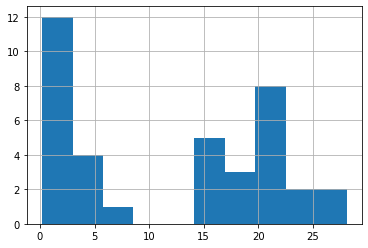

In [26]:
goal_df.value.hist()

In [27]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
33,Martínez,Aston Villa,1,41.1,54,2430,3765733,28.1,152,Goalkeeper,28.1
323,Meslier,Leeds,1,6.2,46,2430,867757,26.5,122,Goalkeeper,26.5
261,Areola,Fulham,1,5.2,45,2520,529866,24.2,109,Goalkeeper,24.2
124,Pope,Burnley,1,13.4,56,2520,1006226,22.9,128,Goalkeeper,22.9
164,Mendy,Chelsea,1,7.3,51,2160,1217000,22.2,113,Goalkeeper,22.2
171,Guaita,Crystal Palace,1,3.1,48,2610,484542,21.9,105,Goalkeeper,21.9
617,Fabianski,West Ham,1,3.1,50,2340,532447,21.6,108,Goalkeeper,21.6
591,Johnstone,West Brom,1,2.5,45,2520,408294,21.3,96,Goalkeeper,21.3
383,Santana de Moraes,Man City,1,9.8,61,2610,937508,21.1,129,Goalkeeper,21.1
271,Schmeichel,Leicester,1,9.9,55,2610,602679,20.7,114,Goalkeeper,20.7


<AxesSubplot:>

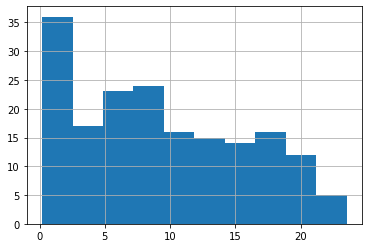

In [28]:
def_df.value.hist()

In [29]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
310,Dallas,Leeds,2,23.1,51,2510,2670584,23.5,120,Defender,23.5
621,Cresswell,West Ham,2,27.3,58,2520,3088072,23.3,135,Defender,23.3
48,Targett,Aston Villa,2,15.0,50,2414,1632700,23.2,116,Defender,23.2
378,Stones,Man City,2,23.0,53,1620,2573883,23.0,122,Defender,23.0
52,Konsa Ngoyo,Aston Villa,2,7.1,46,2205,1328565,21.5,99,Defender,21.5
428,Wan-Bissaka,Man Utd,2,17.1,57,2430,1692453,21.1,120,Defender,21.1
416,Shaw,Man Utd,2,12.6,52,2023,1249529,20.8,108,Defender,20.8
398,Gato Alves Dias,Man City,2,24.4,61,2393,2678413,20.8,127,Defender,20.8
292,Justin,Leicester,2,7.7,49,2070,2915043,20.6,101,Defender,20.6
414,Maguire,Man Utd,2,5.3,55,2610,574771,20.5,113,Defender,20.5


In [30]:
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
376,Gündogan,Man City,3,37.4,62,1739,3904164,22.9,142,Midfielder,22.9
634,Soucek,West Ham,3,13.8,53,2520,2660569,22.1,117,Midfielder,22.1
520,Ward-Prowse,Southampton,3,10.5,59,2610,2532791,21.4,126,Midfielder,21.4
665,Lomba Neto,Wolves,3,7.1,57,2428,2095640,20.7,118,Midfielder,20.7
144,Frello Filho,Chelsea,3,4.7,47,1434,1467531,19.4,91,Midfielder,19.4
313,Harrison,Leeds,3,2.5,54,2059,715497,19.3,104,Midfielder,19.3
552,Son,Spurs,3,54.0,96,2354,7320629,18.6,179,Midfielder,18.6
288,Barnes,Leicester,3,4.8,68,1944,2579798,18.5,126,Midfielder,18.5
417,Borges Fernandes,Man Utd,3,56.3,115,2465,5534563,18.2,209,Midfielder,18.2
331,Dias Belloli,Leeds,3,12.6,55,1796,1450437,18.0,99,Midfielder,18.0


In [31]:
slim_elements_df.to_csv('~/Desktop/jupyter_projects/fpl_data.csv')